In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from src.preprocessing import Preprocessor
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("data/pf_suvs_i302_1s2025.csv")

In [4]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

In [5]:
preprocessor = Preprocessor(train)

In [6]:
train = preprocessor.preprocess(train)

In [7]:
val = preprocessor.preprocess(val)

In [8]:
x_train = train.drop(columns=["Precio"])
y_train = train["Precio"]

x_val = val.drop(columns=["Precio"])
y_val = val["Precio"]

In [9]:
cboost = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.1,
    depth=8,    
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    text_features=['Versión', 'Título', 'Descripción'], 
    bootstrap_type= 'Bernoulli',
    subsample=0.75, 
    min_data_in_leaf=10,
    colsample_bylevel=0.75, 
)

cboost.fit(
    x_train, y_train,
    eval_set=(x_val, y_val),
    use_best_model=True,
    early_stopping_rounds=100
)

0:	learn: 18924.7010482	test: 21319.0712408	best: 21319.0712408 (0)	total: 11.2s	remaining: 4h 39m 27s


KeyboardInterrupt: 

In [ ]:
print(cboost.get_all_params())

NameError: name 'cboost' is not defined

## Validación

In [ ]:
y_pred = cboost.predict(x_val)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

r2 = r2_score(y_val, y_pred)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")


Root Mean Squared Error: 5510.293809266538
R^2 Score: 0.9395135547165873
Mean Absolute Error: 2645.880346249927


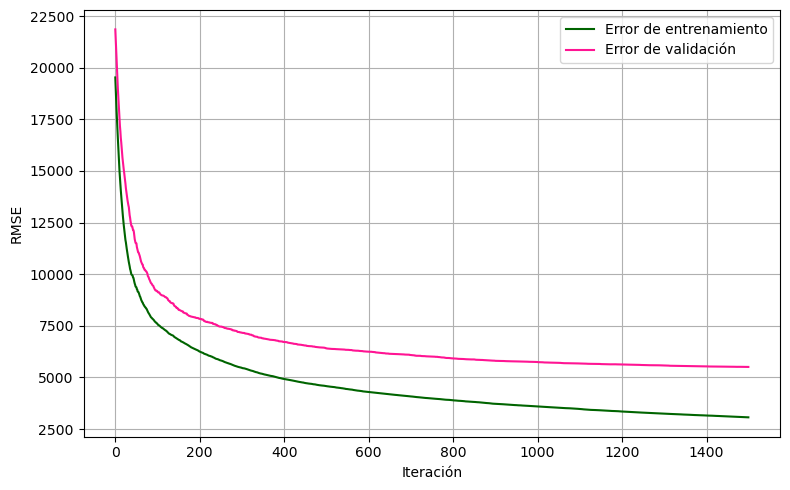

In [ ]:
evals_result = cboost.get_evals_result()
train_loss = evals_result['learn']['RMSE']
valid_loss = evals_result['validation']['RMSE']
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Error de entrenamiento', color='darkgreen')
plt.plot(valid_loss, label='Error de validación', color='deeppink')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Entrenamiento

In [ ]:
y_pred_train = cboost.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5
print(f"Train Root Mean Squared Error: {rmse_train}")
r2_train = r2_score(y_train, y_pred_train)
print(f"Train R^2 Score: {r2_train}")
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f"Train Mean Absolute Error: {mae_train}")

Train Root Mean Squared Error: 3071.257953611578
Train R^2 Score: 0.9767664836771189
Train Mean Absolute Error: 2086.4624227129316


## Test

In [ ]:
test = preprocessor.preprocess(test)

In [ ]:
x_test = test.drop(columns=["Precio"])
y_test = test["Precio"]

In [ ]:
y_pred_test = cboost.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
print(f"Test Root Mean Squared Error: {rmse_test}")
r2_test = r2_score(y_test, y_pred_test)
print(f"Test R^2 Score: {r2_test}")
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Test Mean Absolute Error: {mae_test}")

Test Root Mean Squared Error: 5998.732697502069
Test R^2 Score: 0.906476182179518
Test Mean Absolute Error: 2694.3337662401186
